# Make a uniform bedrock map

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import caesarpy as cp
from scipy.interpolate import RegularGridInterpolator

Use the input DEM to create a soil thickness map of uniform thickness. First step is to get the DEM. 

In [2]:
ascfile = '/work/armitagj/runs/caesar-explore/ener440/sithas_0_00083vfall/input_data/DEM_Sithas_elevation.asc'
ncols, nrows, geotransform, elv_array = cp.demio.asc2numpy(ascfile)
ascfile = '/work/armitagj/runs/caesar-explore/ener440/sithas_0_00083vfall/input_data/DEM_sithas_soil_thickness.asc'
ncols, nrows, geotransform, soil_array = cp.demio.asc2numpy(ascfile)

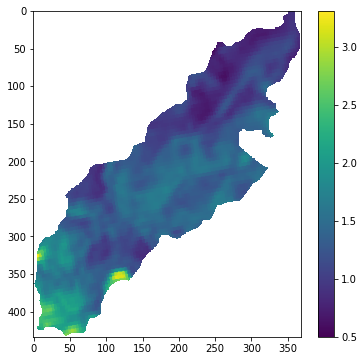

In [8]:
plt.figure(figsize=[6, 6])
plt.imshow(soil_array, aspect='auto')
plt.colorbar()
plt.show()

Use the array to create an array of soil thickness.

In [4]:
soil = elv_array.copy()
soil[~np.isnan(soil)] = 1

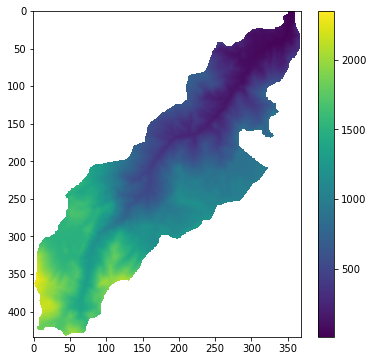

In [5]:
plt.figure(figsize=[6, 6])
plt.imshow(elv_array - soil_array, aspect='auto')
plt.colorbar()
plt.show()

Export the soil thickness map as a `asc` file to be read into CL. I need to use the coordinates `geotransform` from the DEM. 

In [6]:
def array2asc(data_array, geotransform, ascfile):
    """
    Function to output an array to an ascii file (.asc)
    :param data: input array
    :param ascfile: output ascii file name (CAESAR expects .asc)
    :return: None
    """

    f = open(ascfile, 'w')
    f.write('ncols         {}\n'.format(np.int(np.shape(data_array)[1])))
    f.write('nrows         {}\n'.format(np.int(np.shape(data_array)[0])))
    f.write('xllcorner     {}\n'.format(geotransform[0]))
    f.write('yllcorner     {}\n'.format(geotransform[3]))
    f.write('cellsize      {}\n'.format(geotransform[1]))
    f.write('NODATA_value  -9999\n')

    pix = '{0} '
    for i in range(np.shape(data_array)[0]):
        for j in range(np.shape(data_array)[1]):
            if np.isnan(data_array[i, j]) == True:
                f.write(pix.format(np.int(-9999)))  # need to replace nan with -9999
            else:
                f.write(pix.format(data_array[i, j]))
        f.write("\n")
    f.close()

In [7]:
ascfile = 'DEM_bedrock.asc'
array2asc(elv_array - soil_array, geotransform, ascfile)